In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0, 0.5, 'Frequency')

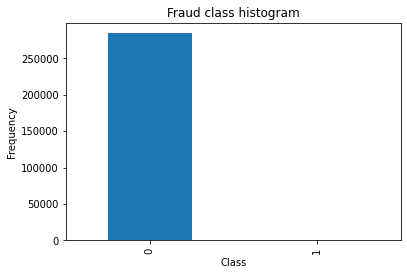

In [4]:
count_classes = pd.value_counts(data['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [5]:
from sklearn.preprocessing import StandardScaler


data = data.drop(['Time','Amount'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [6]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [7]:
# Number of data points in the minority class
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# Picking the indices of the normal classes
normal_indices = data[data.Class == 0].index

# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [8]:
# Out of the indices we picked, randomly select "x" number (number_records_fraud)
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

# Appending the 2 indices
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

# Under sample dataset
under_sample_data = data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# Showing ratio
print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.Class == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.Class == 1])/len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resampled data:  984


In [9]:
from sklearn.model_selection import train_test_split

# Whole dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

print("Number transactions train dataset: ", len(X_train))
print("Number transactions test dataset: ", len(X_test))
print("Total number of transactions: ", len(X_train)+len(X_test))

# Undersampled dataset
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 0)
print("")
print("Number transactions train dataset: ", len(X_train_undersample))
print("Number transactions test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number transactions train dataset:  199364
Number transactions test dataset:  85443
Total number of transactions:  284807

Number transactions train dataset:  688
Number transactions test dataset:  296
Total number of transactions:  984


In [10]:
scaler=StandardScaler()

In [11]:
scaled_X_train = scaler.fit_transform(X_train_undersample)
scaled_X_test = scaler.fit_transform(X_test_undersample)

In [12]:
X_train_undersample.shape

(688, 28)

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow import keras
def ANN(scaled_X_train, y_train, scaled_X_test, y_test, loss):
    model = keras.Sequential([
        keras.layers.Dense(28, input_dim=28, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    
    model.fit(scaled_X_train, y_train, epochs=100)

    print(model.evaluate(scaled_X_test, y_test))

    y_preds = model.predict(scaled_X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [14]:
y_preds = ANN(scaled_X_train, y_train_undersample, scaled_X_test, y_test_undersample, 'binary_crossentropy')

2022-08-27 19:47:15.943494: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-08-27 19:47:16.128150: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 0.6365 - accuracy: 0.6715
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8401
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3378 - accuracy: 0.9012
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2524 - accuracy: 0.9230
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9244
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9360
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.9433
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1592 - accuracy: 0.9404
Epoch 9/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1494 - accuracy: 0.9448
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9520
Epoch 11/

In [15]:
y_pred = []
for element in y_preds:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [16]:
y_preds[:5]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)

In [17]:
y_pred[:5]

[0, 0, 1, 0, 0]

Text(69.0, 0.5, 'Truth')

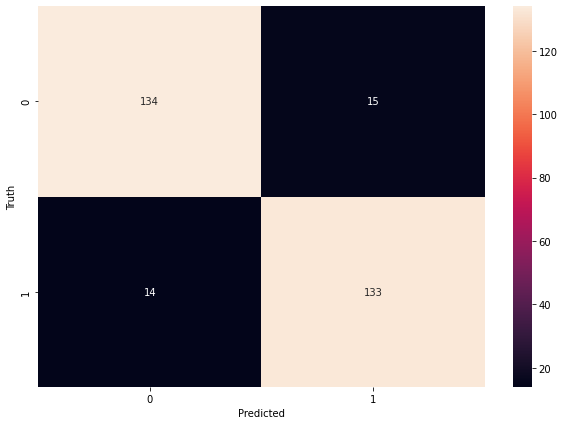

In [18]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test_undersample,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
model = keras.Sequential([
        keras.layers.Dense(28, input_dim=28, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_undersample,y_train_undersample, epochs=100)

print(model.evaluate(X_test_undersample, y_test_undersample))

y_preds = model.predict(X_test.values)
y_preds = np.round(y_preds)

print("Classification Report: \n", classification_report(y_test, y_preds))

Epoch 1/100
22/22 [==============================] - 1s 3ms/step - loss: 0.5682 - accuracy: 0.7122
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3796 - accuracy: 0.8605
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3078 - accuracy: 0.9259
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2431 - accuracy: 0.9288
Epoch 5/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1946 - accuracy: 0.9346
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.1642 - accuracy: 0.9433
Epoch 7/100
22/22 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.9433
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1312 - accuracy: 0.9462
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1211 - accuracy: 0.9549
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.1136 - accuracy: 0.9549
Epoch 11/

If find this notebook useful then please upvote it